In [1]:
## import the necessary
import pandas as pd
import numpy as np
## for data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
pip install category_encoders


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
##for modelling
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [4]:
##EVALUATION metrics
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error


In [5]:
data=pd.read_csv('CustomerData.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

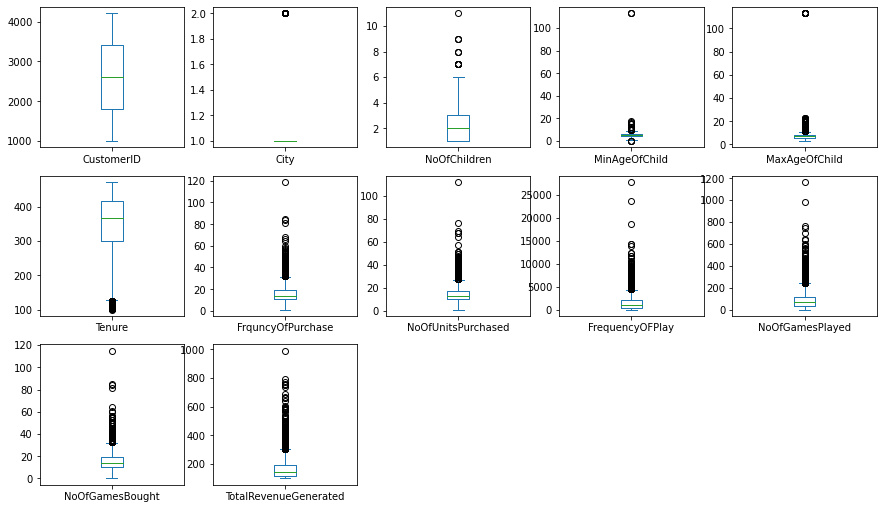

In [6]:
data.plot(kind='box',subplots=True,sharex=False,layout=(5,5),figsize=(15,15))
plt.show

In [7]:

data.shape

(3209, 14)

In [8]:
data.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [9]:
data.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [10]:
cat=['City','NoOfChildren','FavoriteChannelOfTransaction','FavoriteGame']
data['City']=data['City'].map({1:'A',2:'B'})
data['NoOfChildren']=data['NoOfChildren'].map({1:'a',2:'b',3:'c',4:'d',5:'e',6:'f',7:'g',8:'h',9:'i',11:'j'})


In [11]:
from category_encoders import TargetEncoder

In [12]:
te=TargetEncoder()
for col in cat:
    te.fit(data[col],data['TotalRevenueGenerated'])
    cats=te.transform(data[col])
    cats.columns=[x.lower() for x in cats.columns]
    data=pd.concat([data,cats],axis=1)
    
data.head()


C:\Users\onlyf\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\onlyf\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated,city,noofchildren,favoritechanneloftransaction,favoritegame
0,1001,A,b,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51,170.56389,167.920655,155.864353,168.895598
1,1002,A,b,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40,170.56389,167.920655,171.213072,168.895598
2,1003,A,d,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01,170.56389,178.019532,171.213072,168.895598
3,1004,A,a,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00,170.56389,158.911950,171.213072,168.895598
4,1005,A,c,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05,170.56389,175.955272,155.864353,168.895598


In [13]:
data.drop(cat,axis=1,inplace=True)
data.head()

,CustomerID,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,city,noofchildren,favoritechanneloftransaction,favoritegame
0,1001,3,8,210,11,11,2344,108,10,107.51,170.56389,167.920655,155.864353,168.895598
1,1002,3,6,442,20,20,245,22,7,382.40,170.56389,167.920655,171.213072,168.895598
2,1003,3,5,424,18,18,1059,130,18,135.01,170.56389,178.019532,171.213072,168.895598
3,1004,6,6,261,11,9,365,34,11,125.00,170.56389,158.911950,171.213072,168.895598
4,1005,6,9,422,44,31,1066,102,44,335.05,170.56389,175.955272,155.864353,168.895598


In [14]:
#data=dat.drop(['FavoriteChannelOfTransaction','FavoriteGame','City','NoOfChildren'],axis=1,inplace=True)

In [15]:
#te=ce.TargetEncoder()
#data.dtypes
#data_trans=te.fit_transform(data['FavoriteChannelOfTransaction'],data['TotalRevenueGenerated'])
#data_new=data_trans.join(data.drop('FavoriteChannelOfTransaction',axis=1))
#data_new

In [16]:
#data

In [17]:
#x_train,x_test,y_train,y_test=train_test_split(data.drop(["TotalRevenueGenerated"], axis = 1),data['TotalRevenueGenerated'],test_size=0.2)

<AxesSubplot:xlabel='NoOfGamesBought', ylabel='TotalRevenueGenerated'>

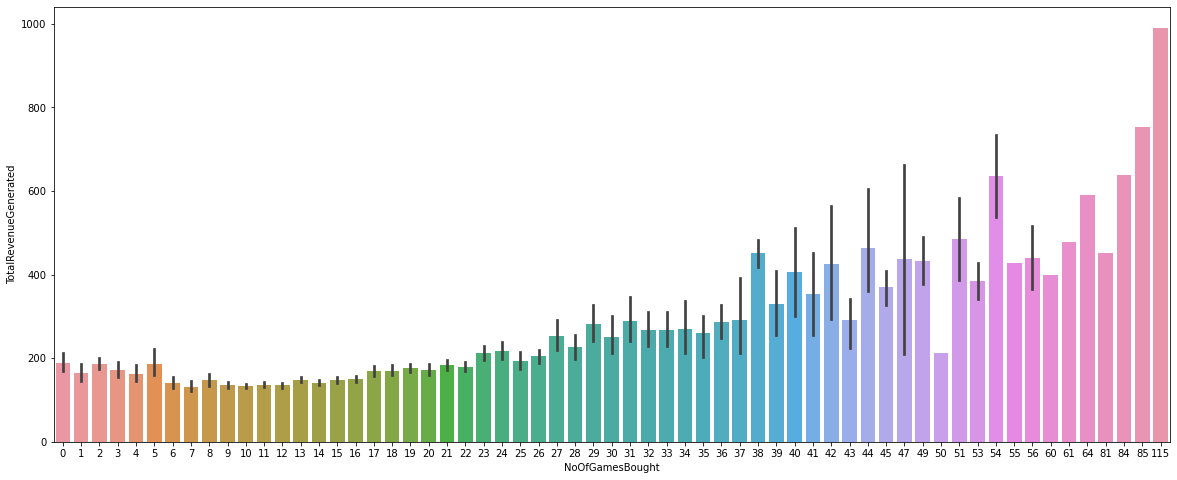

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(20,8))
sns.barplot(data=data,x='NoOfGamesBought',y='TotalRevenueGenerated')

<AxesSubplot:xlabel='NoOfGamesBought', ylabel='count'>

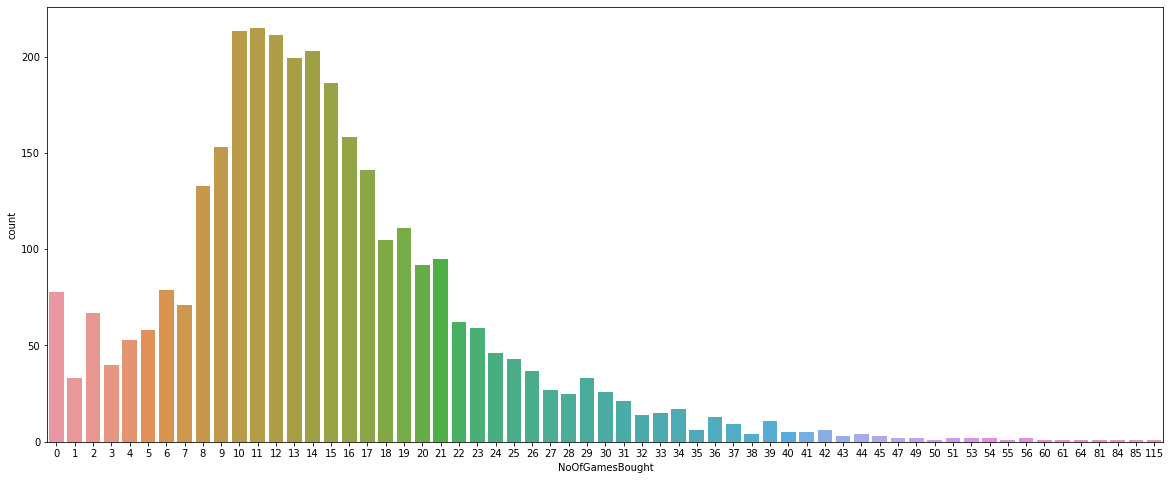

In [19]:
plt.figure(figsize=(20,8))
sns.countplot(data=data,x='NoOfGamesBought')

In [20]:
# plt.figure(figsize=(20,8))
# sns.boxplot(data=data,x='NoOfGamesBought')

In [21]:
len(data.columns)


14

In [22]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['TotalRevenueGenerated'],axis=1),data['TotalRevenueGenerated'] , test_size = 0.1, random_state = 123)

In [24]:
x_train.head()

,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,city,noofchildren,favoritechanneloftransaction,favoritegame
1144,5,113,405,16,14,4438,130,16,170.563890,175.955272,155.864353,168.895598
315,6,6,158,22,22,1070,128,22,152.268142,158.911950,171.213072,168.895598
1441,4,4,366,19,14,1479,43,19,170.563890,158.911950,155.864353,168.895598
1850,3,7,156,13,13,803,71,13,170.563890,178.019532,171.213072,168.895598
1275,5,9,415,21,16,1486,90,21,170.563890,167.920655,155.864353,168.895598


In [25]:
data.dtypes

MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
TotalRevenueGenerated           float64
city                            float64
noofchildren                    float64
favoritechanneloftransaction    float64
favoritegame                    float64
dtype: object

In [26]:
#num=[i for i in x_train.columns if x_train[i].dtype!='category' ]
x_train.columns

Index(['MinAgeOfChild', 'MaxAgeOfChild', 'Tenure', 'FrquncyOfPurchase',
       'NoOfUnitsPurchased', 'FrequencyOFPlay', 'NoOfGamesPlayed',
       'NoOfGamesBought', 'city', 'noofchildren',
       'favoritechanneloftransaction', 'favoritegame'],
      dtype='object')

In [27]:
x_train.isnull().sum()

MinAgeOfChild                   0
MaxAgeOfChild                   0
Tenure                          0
FrquncyOfPurchase               0
NoOfUnitsPurchased              0
FrequencyOFPlay                 0
NoOfGamesPlayed                 0
NoOfGamesBought                 0
city                            0
noofchildren                    0
favoritechanneloftransaction    0
favoritegame                    0
dtype: int64

In [28]:
x_test.isnull().any()

MinAgeOfChild                   False
MaxAgeOfChild                   False
Tenure                          False
FrquncyOfPurchase               False
NoOfUnitsPurchased              False
FrequencyOFPlay                 False
NoOfGamesPlayed                 False
NoOfGamesBought                 False
city                            False
noofchildren                    False
favoritechanneloftransaction    False
favoritegame                    False
dtype: bool

In [29]:
num=[x_train.columns]
num

[Index(['MinAgeOfChild', 'MaxAgeOfChild', 'Tenure', 'FrquncyOfPurchase',
        'NoOfUnitsPurchased', 'FrequencyOFPlay', 'NoOfGamesPlayed',
        'NoOfGamesBought', 'city', 'noofchildren',
        'favoritechanneloftransaction', 'favoritegame'],
       dtype='object')]

In [30]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [31]:
upp_bou = (Q3 + 1.5*IQR)
low_bou = (Q1- 1.5*IQR)

In [32]:
for i in range(len(data['MinAgeOfChild'])):
    if data['MinAgeOfChild'][i]>9.000000:
        print(data['MinAgeOfChild'][i])

15
11
15
11
10
10
11
113
11
12
10
10
12
113
17
113
12
18
16
10


In [33]:
for i in range(len(data['MinAgeOfChild'])):
    if data['MinAgeOfChild'][i]<1.000000:
        print(data['MinAgeOfChild'][i])

0
0
0
0


In [34]:
for i in range(len(data['MaxAgeOfChild'])):
    if data['MaxAgeOfChild'][i]>11.000000:
        print(data['MaxAgeOfChild'][i])

12
13
13
12
20
12
20
15
12
21
21
20
12
15
15
14
13
12
18
13
19
19
20
20
13
20
16
20
15
14
13
12
14
12
12
12
113
113
22
113
12
21
18
13
12
13
12
19
19
14
15
13
113
20
16
22
12
113
12
113
13
13
14
13
13
19
12
21
21
15
113
22
21
21
113
12
18
14
13
23
12
22
13
14
20
20
13
12
20
13
15
21
13
19
13
13
13
19
113
12
22
14
14
22
12
22
14
13
12
20
13
13
22
113
17
113
113
14
20
20
20
12
12
19
22
21
113
113
14
20
12
15
113
12
17
12
21
21
12
22
12
12
12
12
12
18
20
16
12
12
23
113
12
20
13
14
22
113
21
14
21
19
22
23
20
13
12
20
14
13
15
12
13
12
20
15
113
20
113
12
13
113
21
19
22
14
18
16
13
15
12
15
16
12
12
22
14
19
14
13
12
12
12
12
17
13
20
20
13


In [35]:
upp_bou

MinAgeOfChild                      9.000000
MaxAgeOfChild                     11.000000
Tenure                           591.000000
FrquncyOfPurchase                 31.000000
NoOfUnitsPurchased                27.500000
FrequencyOFPlay                 4403.500000
NoOfGamesPlayed                  242.000000
NoOfGamesBought                   32.500000
TotalRevenueGenerated            303.165000
city                             170.563890
noofchildren                     201.520255
favoritechanneloftransaction     171.213072
favoritegame                     168.895598
dtype: float64

In [36]:
low_bou

MinAgeOfChild                      1.000000
MaxAgeOfChild                      3.000000
Tenure                           127.000000
FrquncyOfPurchase                 -1.000000
NoOfUnitsPurchased                -0.500000
FrequencyOFPlay                -1928.500000
NoOfGamesPlayed                  -86.000000
NoOfGamesBought                   -3.500000
TotalRevenueGenerated              4.725000
city                             170.563890
noofchildren                     133.346966
favoritechanneloftransaction     171.213072
favoritegame                     168.895598
dtype: float64

In [37]:
data.describe()

,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,city,noofchildren,favoritechanneloftransaction,favoritegame
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000
mean,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,168.477183,168.477183,168.463694,168.477183,168.477183
std,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,81.798528,5.816706,9.983563,5.875207,2.070031
min,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000,152.268142,158.911950,155.864353,158.239286
25%,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,116.640000,170.563890,158.911950,171.213072,168.895598
50%,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,142.390000,170.563890,167.920655,171.213072,168.895598
75%,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,191.250000,170.563890,175.955272,171.213072,168.895598
max,113.000000,113.000000,472.000000,119.000000,112.000000,27829.000000,1166.000000,115.000000,990.560000,170.563890,312.492922,171.213072,168.895598


In [38]:
scaler=StandardScaler()

In [39]:
x_train_num=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test_num=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
x_test_num

,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,city,noofchildren,favoritechanneloftransaction,favoritegame
0,0.625942,-0.107631,-0.153390,-0.883018,-0.816042,-0.863158,-1.053276,-1.716199,0.364683,-0.967260,0.46806,0.203645
1,0.324404,0.015718,1.355737,-0.762591,-0.389202,0.675225,-0.372363,-1.484662,0.364683,-0.054589,-2.13648,0.203645
2,0.022866,0.139066,1.014256,0.200822,0.464480,-0.369704,-0.361200,0.367628,0.364683,0.759397,0.46806,0.203645
3,0.324404,0.509111,0.386371,0.802956,1.175881,0.186651,1.335500,0.946469,0.364683,0.759397,0.46806,0.203645
4,0.022866,-0.107631,1.245582,0.562102,0.891321,-0.009646,0.397850,0.714932,0.364683,-0.054589,0.46806,0.203645
...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.324404,0.015718,0.287231,0.441676,0.179919,0.188820,0.241575,0.599164,0.364683,-0.054589,0.46806,0.203645
317,-1.183286,-0.107631,-0.627057,-0.160458,0.037639,0.602020,-0.082138,-0.558517,0.364683,0.968527,0.46806,0.203645
318,0.324404,0.139066,-1.706578,0.682529,0.606760,-0.263422,0.565287,0.830701,0.364683,0.968527,0.46806,0.203645
319,0.022866,0.262414,0.022859,-1.003445,-0.958322,-0.710784,-0.852351,-1.021590,0.364683,0.759397,0.46806,0.203645


In [40]:
#ohe=OneHotEncoder(handle_unknown='ignore')

In [41]:
#x_train_cat=pd.DataFrame(ohe.fit_transform(x_train[cat]).todense(),columns=ohe.get_feature_names_out())
#x_test_cat=pd.DataFrame(ohe.transform(x_test[cat]).todense(),columns=ohe.get_feature_names_out())

In [42]:
#train=pd.concat([x_train_num,x_train_cat],axis=1)
#test=pd.concat([x_test_num,x_test_cat],axis=1)
#train

In [43]:
model=SVR(kernel='rbf',C=3)

In [44]:
model.fit(x_train_num,y_train)

SVR(C=3)

In [45]:
train_pred=model.predict(x_train_num)
test_pred=model.predict(x_test_num)

In [46]:
mean_squared_error(y_train,train_pred)

3991.5855800823792

In [47]:
mean_squared_error(y_test,test_pred)

5019.000847332892

In [48]:
mean_absolute_error(y_train,train_pred)

35.512244598701386

In [49]:
mean_absolute_percentage_error(y_train,train_pred)

0.17851269020305122

In [50]:
mean_absolute_error(y_test,test_pred)

36.13040674349906

In [51]:
mean_absolute_percentage_error(y_train,train_pred)

0.17851269020305122

In [52]:
mean_absolute_percentage_error(y_test,test_pred)

0.18796392256974725

In [53]:
mean_squared_error(y_train,train_pred,squared=False)

63.178996352287676

In [54]:
mean_squared_error(y_test,test_pred,squared=False)

70.84490699643054

In [55]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [56]:
y_test.shape

(321,)

In [57]:

LR.fit(x_train_num,y_train)

LinearRegression()

In [58]:
yt_pred=LR.predict(x_train_num)

In [59]:

y_pred=LR.predict(x_test_num)

In [60]:
mean_squared_error(y_train,yt_pred)

1884.274916537416

In [61]:
mean_squared_error(y_test,y_pred)

1826.2960675755048

In [62]:
mean_absolute_error(y_train,yt_pred)

31.370792435315867

In [63]:
mean_absolute_error(y_test,y_pred)

31.403270444575636

In [64]:
mean_absolute_percentage_error(y_train,yt_pred)

0.1881888682167426

In [65]:
mean_absolute_percentage_error(y_test,y_pred)

0.19842229887334512

In [66]:
mean_squared_error(y_train,yt_pred,squared=False)

43.40823558424618

In [67]:
r2 = r2_score(y_train, yt_pred)

In [68]:
r2

0.7174377015182591

In [69]:
mean_squared_error(y_test,y_pred,squared=False)

42.735185357916784

In [70]:
r2= r2_score(y_test , y_pred)

In [71]:
r2

0.7332530353605512

In [72]:
y_pred.shape

(321,)

In [73]:
import matplotlib.pyplot as plt

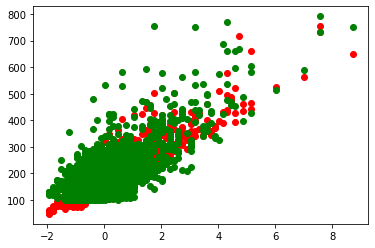

In [74]:
x =x_train_num['NoOfUnitsPurchased']

# the first scatter plot
y1 = list(yt_pred)
plt.scatter(x, y1, color = 'red')

# the second scatter plot
y2 = list(y_train)
plt.scatter(x,y2, color = 'green')

# displaying both plots
plt.show()